# I. Numpy

### Импортируйте NumPy

In [178]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [179]:
m = np.zeros(10, dtype=np.int8)
m[4] = 1
m.reshape(1, 10)

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=int8)

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [180]:
a = np.arange(10, 50)[::-1]
a = a[a % 2 == 0]
a

array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [181]:
m = np.arange(9).reshape(3, 3)
m

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [182]:
r = np.random.randint(0, 100, size=(4,3,2))
print(np.min(r), np.max(r))

0 97


### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [183]:
np.random.seed(11)
a, b = np.random.randint(0, 100, size=(6, 4)), np.random.randint(0, 100, size=(4, 3))
c = np.matmul(a, b)
c

array([[13709, 13787, 17184],
       [13636,  8873, 10310],
       [13560, 12888, 13166],
       [14671,  9311,  9850],
       [ 3433,  3451,  2752],
       [16452, 13189, 16583]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [184]:
np.random.seed(12)
m = np.random.rand(7, 7)
print(m.mean())
print(m.std())
print(m / np.linalg.norm(m))

0.514442085577506
0.2980754838555893
[[0.03704138 0.17781498 0.06326785 0.1282439  0.00350199 0.22075137
  0.2164187 ]
 [0.00803031 0.22993041 0.03296788 0.06819668 0.14562626 0.22687311
  0.2048905 ]
 [0.00054284 0.12523726 0.1326405  0.11662376 0.18456296 0.03861612
  0.18370429]
 [0.00500006 0.03248754 0.02793743 0.07446045 0.16133287 0.11322444
  0.19610433]
 [0.06958028 0.17615139 0.16882215 0.07870655 0.08040723 0.2350023
  0.15007108]
 [0.22833599 0.18440474 0.19822859 0.09770525 0.10843785 0.09626152
  0.2391062 ]
 [0.04266412 0.23128737 0.1007351  0.10188894 0.11128281 0.0897961
  0.11184967]]


# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузите датасет Tips из набора датасетов seaborn

In [186]:
df = sns.load_dataset('Tips')

### Посмотрите на первые 5 строчек

In [187]:
df.head

<bound method NDFrame.head of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

### Узнайте сколько всего строчек и колонок в данных

In [188]:
df.shape

(244, 7)

### Проверьте есть ли пропуски в данных

In [189]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

In [190]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Найдите максимальное значение 'total_bill'

In [191]:
df['total_bill'].max()

50.81

### Найдите количество курящих людей

In [192]:
smoker_count = df['smoker'].value_counts().get('Yes', 0)
smoker_count

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [193]:
m = df.groupby('day')['total_bill'].mean()
m

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

 ### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [194]:
f = df.loc[df.total_bill > df.total_bill.median()]
f[['sex', 'tip']].groupby('sex').mean()

,tip
sex,
Female,3.663939
Male,3.756404


### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [199]:
df['smoker'] = df['smoker'].replace({'Yes': 1, 'No': 0})
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,Dinner,3
240,27.18,2.00,Female,1,Sat,Dinner,2
241,22.67,2.00,Male,1,Sat,Dinner,2
242,17.82,1.75,Male,0,Sat,Dinner,2


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

<Axes: ylabel='Frequency'>

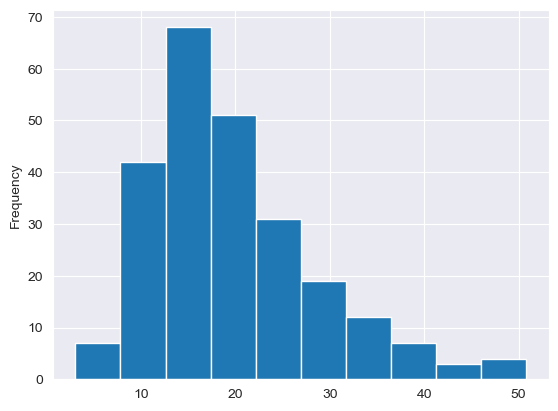

In [201]:
df['total_bill'].plot.hist()

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

<Axes: xlabel='total_bill', ylabel='tip'>

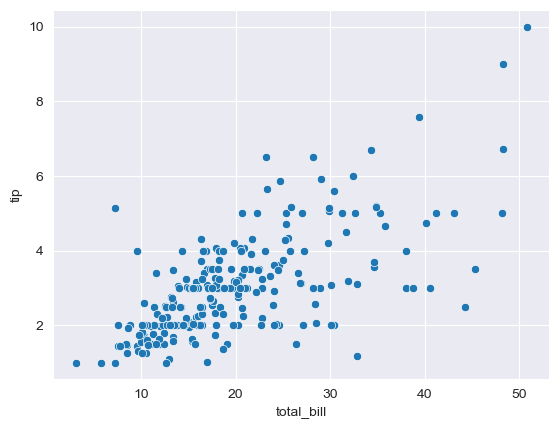

In [203]:
sns.scatterplot(data=df, x='total_bill', y='tip')

### Постройте pairplot

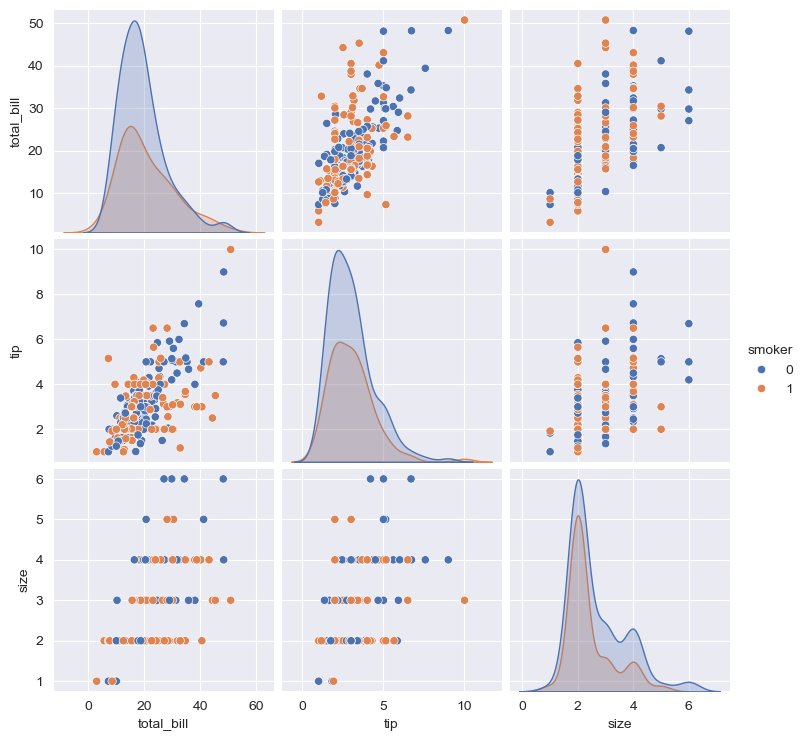

In [208]:
sns.pairplot(df, hue='smoker', diag_kind='kde', palette='deep')

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

<Axes: xlabel='day', ylabel='total_bill'>

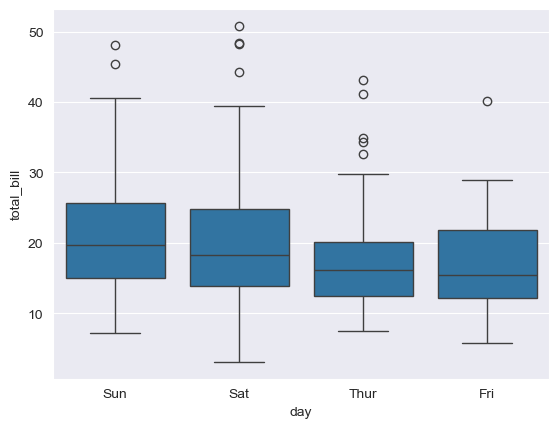

In [235]:
sns.boxplot(x='day', y='total_bill', data=df)

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

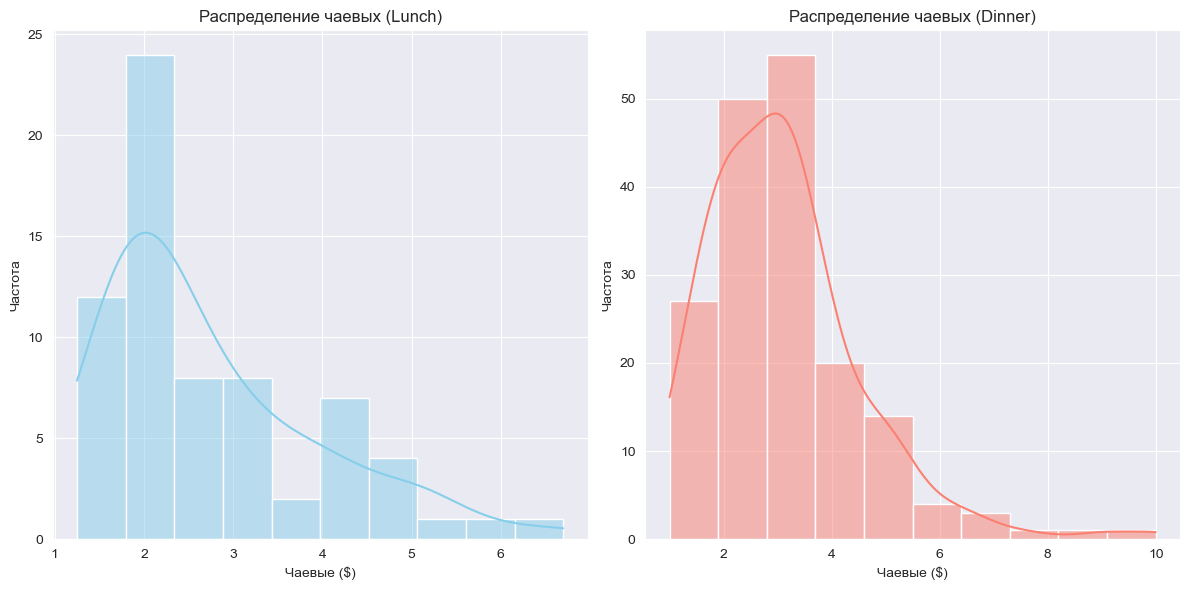

In [236]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['time'] == 'Lunch']['tip'], bins=10, kde=True, color='skyblue')
plt.title('Распределение чаевых (Lunch)')
plt.xlabel('Чаевые ($)')
plt.ylabel('Частота')
plt.subplot(1, 2, 2)
sns.histplot(df[df['time'] == 'Dinner']['tip'], bins=10, kde=True, color='salmon')
plt.title('Распределение чаевых (Dinner)')
plt.xlabel('Чаевые ($)')
plt.ylabel('Частота')
plt.tight_layout()

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимости от признака 'smoker'

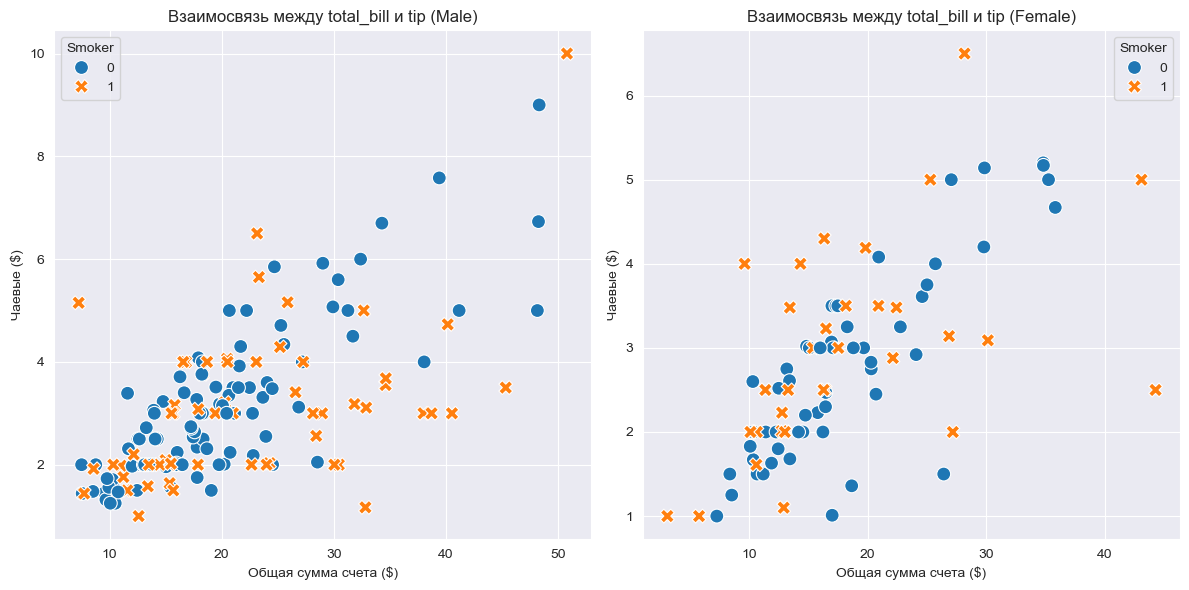

In [237]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df[df['sex'] == 'Male'], 
                x='total_bill', 
                y='tip',
                hue='smoker',
                style='smoker', 
                markers=['o', 'X'],
                s=100
                )
plt.title('Взаимосвязь между total_bill и tip (Male)')
plt.xlabel('Общая сумма счета ($)')
plt.ylabel('Чаевые ($)')
plt.legend(title='Smoker')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df[df['sex'] == 'Female'], 
                x='total_bill', 
                y='tip', 
                hue='smoker',
                style='smoker', 
                markers=['o', 'X'],
                s=100
                )
plt.title('Взаимосвязь между total_bill и tip (Female)')
plt.xlabel('Общая сумма счета ($)')
plt.ylabel('Чаевые ($)')
plt.legend(title='Smoker')

plt.tight_layout()

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

Из взаимосвязи между признаками 'total_bill' и 'day', можно сделать вывод, что в выходные дни, сумма счетов может быть выше, чем в будние дни, из-за увеличенного числа клиентов, семейных встреч и праздников. 
Исходя из графиков распределения чаевых можно сделать вывод, что в обеденное время чаевые чаще всего находятся в нижней части диапазона, тогда как в вечернее время чаевые могут быть более высокими, что может связано с большими счетами или более высокой ценой еды и напитков.
Из взаимосвязи между total_bill и tip можно сделать вывод, что люди, оставляющие более высокие чаевые, в основном имеют более высокие счета. Можно также заметить, что курящие люди имеют несколько большую сумму счета.

In [238]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4


Text(0, 0.5, 'Сумма чаевых (tips)')

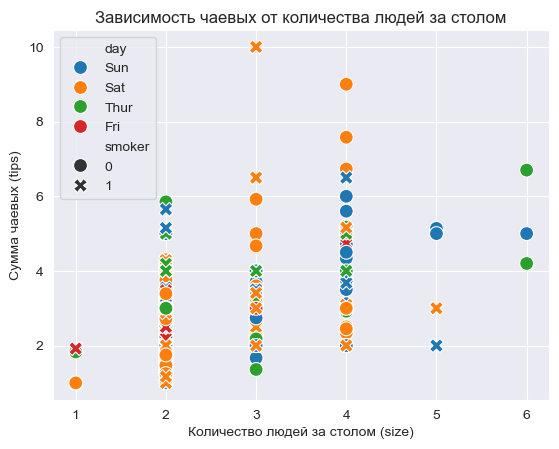

In [250]:
sns.scatterplot(df, x='size', y='tip', hue='day', style='smoker', s=100)
plt.title('Зависимость чаевых от количества людей за столом')
plt.xlabel('Количество людей за столом (size)')
plt.ylabel('Сумма чаевых (tips)')

Из зависимости чаевых от количества людей за столом, можно сделать вывод что, как правило, компания из 4-х человек
оставляет больше всего чаевых.